# Movie dataset correlation

![](https://i.imgur.com/22bilR4.jpg)

In [100]:
# import libraries
import pandas as pd
import seaborn as sns 
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams ["figure.figsize"]= (12, 8)

# Loadind Data

In [65]:
#Read in the data
df =pd.read_csv("movies.csv")


# Exploring Data

In [66]:
# exploring the first rows of data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Cleaning Data

In [67]:
# checking for missing data

#checking which columns have missing data
df.columns[df.isnull().any()]

Index(['rating', 'released', 'score', 'votes', 'writer', 'star', 'country',
       'budget', 'gross', 'company', 'runtime'],
      dtype='object')

In [68]:
# storing rows with missing values in a new dataframe
df1 = df[df.isna().any(axis=1)]

In [69]:
#checking for the percentage of null data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [70]:
# dropping null data since they are not a huge part of dataset

df.dropna(inplace=True)

In [71]:
#checking data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [72]:
# changing data type for budget, gross and votes columns

df["budget"] = df["budget"].astype("int64")

df["gross"] = df["gross"].astype("int64")

df["votes"] = df["votes"].astype("int64")



In [73]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [75]:
#spliting released coloumn into 2 columns of "released date " and "released country" and droping the relesed column
df['released_date'] = df.released.str.split('(', expand=True)[0]
df['released_date'] = pd.to_datetime(df.released_date)
df['year'] = df.released_date.dt.year
df['released_country'] = df.released.str.split('(', expand=True)[1].str.replace(r'[^a-zA-Z\d\s:]', '')
df = df.drop('released', axis=1)

<ipython-input-75-71c4d0520681>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['released_country'] = df.released.str.split('(', expand=True)[1].str.replace(r'[^a-zA-Z\d\s:]', '')


In [76]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States


In [82]:
# sorting the data based on its gross column since we are going to check for regression of gross and budget

df = df.sort_values(by = ["gross"], inplace = False, ascending = False)

In [83]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,United States
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015,5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015-01-15,Sweden
2434,Philadelphia Experiment II,PG-13,Action,1994,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994-06-04,South Korea
3681,Ginger Snaps,Not Rated,Drama,2001,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001-05-11,Canada
272,Parasite,R,Horror,1982,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982-03-12,United States


# Analyzing Data

<function matplotlib.pyplot.show(close=None, block=None)>

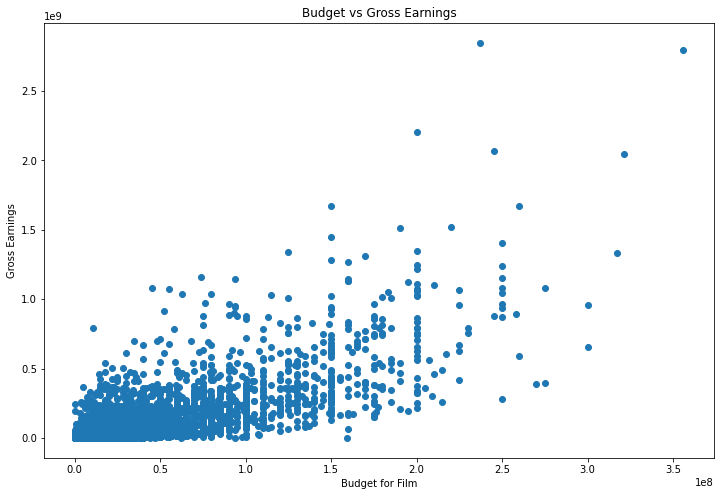

In [87]:
#checking for correlations

#scatter plot with budget and gross revenue


plt.scatter(x=df["budget"], y=df["gross"])
plt.title("Budget vs Gross Earnings")

plt.xlabel("Budget for Film")
plt.ylabel("Gross Earnings")
plt.show

In [85]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,United States
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States


<AxesSubplot:xlabel='budget', ylabel='gross'>

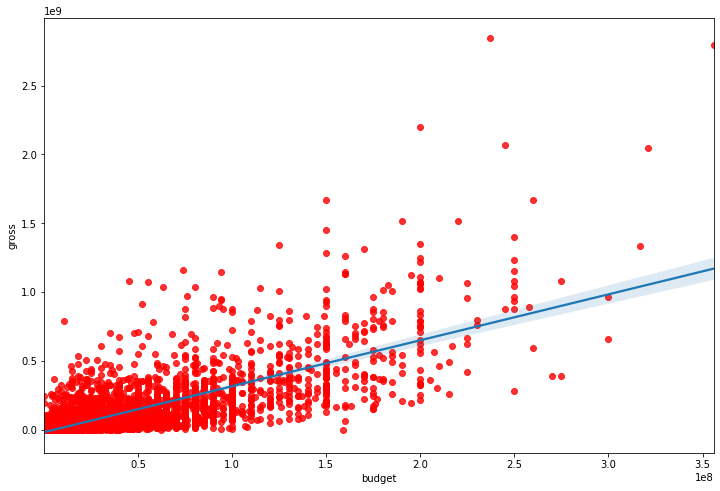

In [89]:
# plotting budget vs gross using seaborn

sns.regplot(x = "budget", y = "gross", data = df, scatter_kws = {"color": "red"})

In [90]:
# finding the amount of correlation

In [95]:
df.corr() #pearson

,year,score,votes,budget,gross,runtime
year,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000


In [92]:
df.corr(method = "kendall")

,year,score,votes,budget,gross,runtime
year,1.000000,0.043400,0.293044,0.213719,0.232372,0.064793
score,0.043400,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.293044,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.213719,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.232372,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064793,0.292254,0.205344,0.231278,0.176979,1.000000


In [93]:
df.corr(method = "spearman")

,year,score,votes,budget,gross,runtime
year,1.000000,0.063674,0.422988,0.302535,0.340529,0.095507
score,0.063674,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.422988,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.302535,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.340529,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095507,0.412155,0.300621,0.330794,0.257400,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

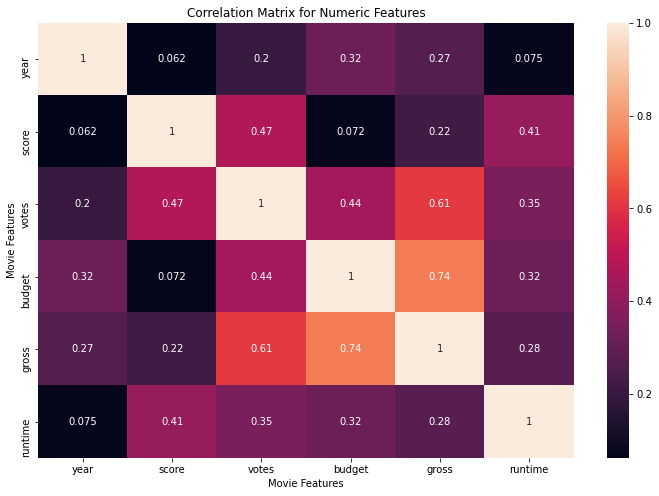

In [97]:
# visualizing correlation based on df.corr pearson

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show

In [102]:
# plotting company vs gross using seaborn

#fist we need to transform the category type data into numeric

df_numeric = df

for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype == "object"):
        df_numeric [col_name] = df_numeric[col_name].astype("category")
        df_numeric[col_name] = df_numeric[col_name].cat.codes
df_numeric


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
5445,386,5,0,2009,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,2009-12-18,47
7445,388,5,0,2019,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,2019-04-26,47
3045,4909,5,6,1997,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,1997-12-19,47
6663,3643,5,0,2015,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,2015-12-18,47
7244,389,5,0,2018,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,2018-04-27,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2015,5.8,3500,585,2924,1498,47,3000000,5073,1385,96.0,2015-01-15,41
2434,2969,5,0,1994,4.5,1900,1805,3102,186,47,5000000,2970,1376,97.0,1994-06-04,39
3681,1595,3,6,2001,6.8,43000,952,1683,527,6,5000000,2554,466,108.0,2001-05-11,8
272,2909,6,9,1982,3.9,2300,261,55,1473,47,800000,2270,582,85.0,1982-03-12,47


In [103]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
5445,386,5,0,2009,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,2009-12-18,47
7445,388,5,0,2019,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,2019-04-26,47
3045,4909,5,6,1997,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,1997-12-19,47
6663,3643,5,0,2015,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,2015-12-18,47
7244,389,5,0,2018,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,2018-04-27,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2015,5.8,3500,585,2924,1498,47,3000000,5073,1385,96.0,2015-01-15,41
2434,2969,5,0,1994,4.5,1900,1805,3102,186,47,5000000,2970,1376,97.0,1994-06-04,39
3681,1595,3,6,2001,6.8,43000,952,1683,527,6,5000000,2554,466,108.0,2001-05-11,8
272,2909,6,9,1982,3.9,2300,261,55,1473,47,800000,2270,582,85.0,1982-03-12,47


In [ ]:
# finding the amount of correlation

In [104]:
df_numeric.corr() #pearson

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_country
name,1.000000,-0.029234,0.010996,0.025542,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,-0.002908
rating,-0.029234,1.000000,0.147796,0.022021,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,-0.063883
genre,0.010996,0.147796,1.000000,-0.069147,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.075552
year,0.025542,0.022021,-0.069147,1.000000,0.061923,0.203098,-0.037371,-0.025495,-0.032687,-0.073569,0.320312,0.268721,-0.018806,0.075294,-0.067536
score,0.014450,0.065983,0.035106,0.061923,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,-0.043528
votes,0.012615,0.006031,-0.135990,0.203098,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.066105
director,0.015246,0.014656,-0.008553,-0.037371,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.005705
writer,0.012880,-0.003149,0.017578,-0.025495,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.001983
star,-0.006882,0.009196,0.003341,-0.032687,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.023346
country,-0.025490,0.008230,-0.009164,-0.073569,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,0.167894


<function matplotlib.pyplot.show(close=None, block=None)>

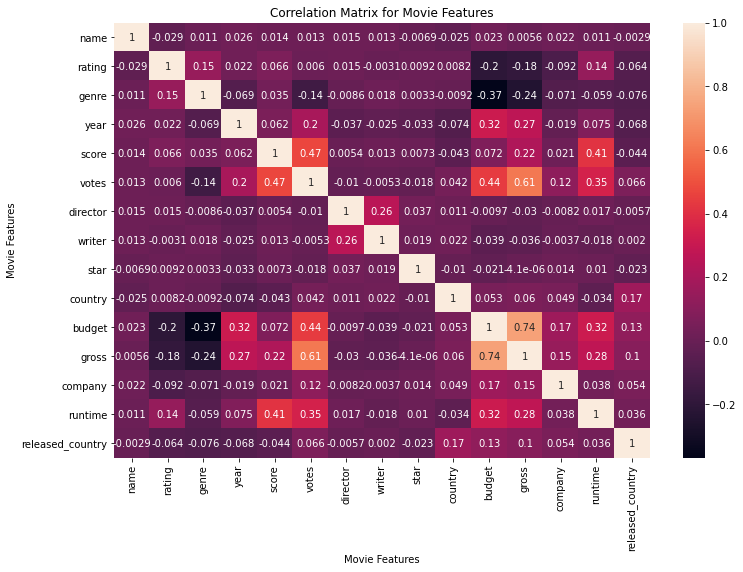

In [107]:
# visualizing correlation based on df_numeric.corr pearson

correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Movie Features")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show

In [109]:
#Exploring Features with more than 0.5 correlation


corr_pairs = df_numeric.corr().unstack().sort_values()
corr_pairs

budget            genre              -0.368523
genre             budget             -0.368523
                  gross              -0.244101
gross             genre              -0.244101
rating            budget             -0.203946
                                        ...   
year              year                1.000000
genre             genre               1.000000
rating            rating              1.000000
runtime           runtime             1.000000
released_country  released_country    1.000000
Length: 225, dtype: float64

In [111]:
high_corr = corr_pairs[(corr_pairs) > 0.5]
                        

high_corr

gross             votes               0.614751
votes             gross               0.614751
budget            gross               0.740247
gross             budget              0.740247
name              name                1.000000
writer            writer              1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
country           country             1.000000
star              star                1.000000
director          director            1.000000
votes             votes               1.000000
score             score               1.000000
year              year                1.000000
genre             genre               1.000000
rating            rating              1.000000
runtime           runtime             1.000000
released_country  released_country    1.000000
dtype: float64

it seems that company does not play a huge part in the fact that a film will be a success
votes have a high correlation which shows 
the social impact of people seeing a movie based on a high rating on movie database platforms